# Data Visualizations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

I'm gonna load some functions I personally like.

In [ ]:
# Function to upload CSV data into Colab using a dialog box.
# What can I say? I prefer a dialog box to a hard-coded variable.
def upload_df():
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    return_df = pd.read_csv(filename)
    return return_df

# Function to check for missing data
# Got this one from one of the classes. It's just one of those things you don't even want to have ever type out by yourself. Thank you, guy who wrote this.
def check_missing(data):
  return pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

### Understanding the structure of the data

In [ ]:
# Read the data. In this case, navigating to where I stored foodhub_order.csv.
fh_base = upload_df() # Now only pick csv's, y'all.

Saving foodhub_order.csv to foodhub_order.csv


In [ ]:
# Quick data sample
fh_base

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Shape method
fh_base.shape

(1898, 9)

#### Observations:
- 1898 rows, 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Taking the obvious hint
fh_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Order ID and customer ID fields are unqiue identifiers in integer format
- Restaurant name, cuisine type, day of week, and rating are all strings. I will look closer at the latter 3.
- Cost is a float, as expected.
- The time-based fields are integer, as expected when treated as discrete values in minutes.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking overall for missing data
check_missing(fh_base)

,Count,Percentage


* No null values are present.
* Checking for unique values in a few fields.

In [ ]:
# Checking unique values in cuisine_type field
fh_cuisine_types = fh_base['cuisine_type'].unique()
print(fh_cuisine_types)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [ ]:
# Checking unique values in the day_of_the_week field
fh_base['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
# Checking unique values in the rating field
fh_base['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

- Explains why rating is a non-numeric field. Checking value counts.

In [ ]:
# Checking value counts in the rating field
fh_base['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
- There are no null values in the data.
- There are 14 distinct categories used for food
- As expected, day of week is either weekday or weekend.
- There are a high number of ratings listed as "Not given". This isn't the same as null or missing, as many customers simply choose not to give a rating. I could impute a value for the missing rows or drop them entirely. I'd rather not do either, since out current data shows has only 3 ordinal values. Maybe I'll revisit it, but for now, I'm leaving the data alone.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Checking statistics on data
fh_base.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- Min food prep time is 20 minutes
- Mean food prep time is about 27 minutes
- Max food prep time is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Checking value counts in the rating field
fh_base['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


- 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

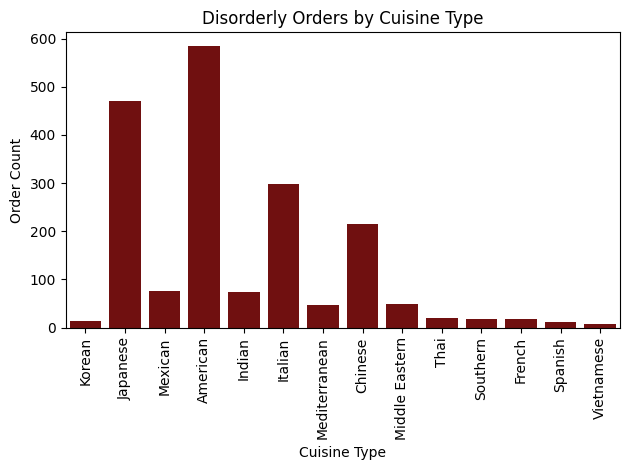

In [ ]:
# Countplot of orders by food category
sns.countplot(data=fh_base, x='cuisine_type', color='maroon')
plt.title('Disorderly Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- This version is a bit chaotic. Let's bring some order to the chaos.

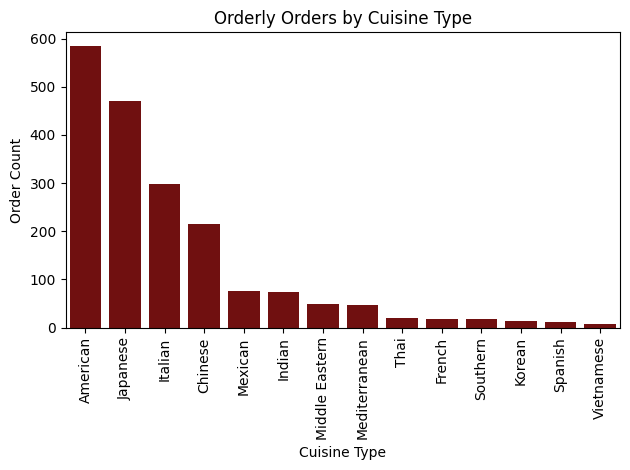

In [ ]:
# Redoing graph, but sorted by descending order
type_order = fh_base['cuisine_type'].value_counts().index
sns.countplot(data=fh_base, x='cuisine_type', order=type_order, color='maroon')
plt.title('Orderly Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


- American, Japanese, Italian, Chinese, and Mexican are the top 5 cuisine types ordered.
- Thai, French, Southern, Korean, Spanish, and Vietnamese are not in as high of demand.

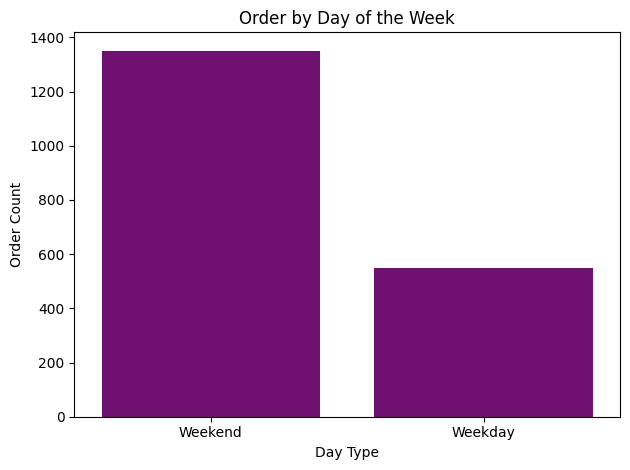

In [ ]:
# Histogram of orders by day of the week
sns.countplot(data=fh_base, x='day_of_the_week', color='purple')
plt.title('Order by Day of the Week')
plt.xlabel('Day Type')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- Wow. Weekends make up over 2/3's of orders. I'd be interested in knowing how weekends were defined here. Is Friday night part of the "Weekend"?

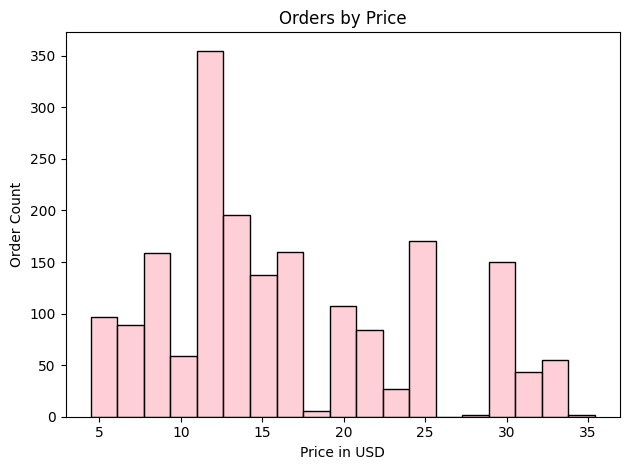

In [ ]:
# Histogram of price
sns.histplot(data=fh_base, x='cost_of_the_order', color='pink')
plt.title('Orders by Price')
plt.xlabel('Price in USD')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- I can vaguely see a central tendency between 12 and 17? Not clean enough and a bit unclear, so I'm redoing with larger bins.

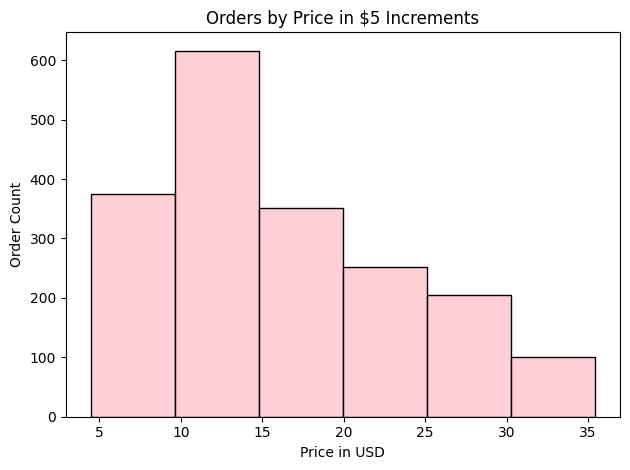

In [ ]:
# Histogram of price
sns.histplot(data=fh_base, x='cost_of_the_order', binwidth=5, color='pink')
plt.title('Orders by Price in $5 Increments')
plt.xlabel('Price in USD')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- I like this version better. Even though it's less detailed, I think people recognize ranges of 5 and it clearly shows a nice central tendency between 10 and 15.

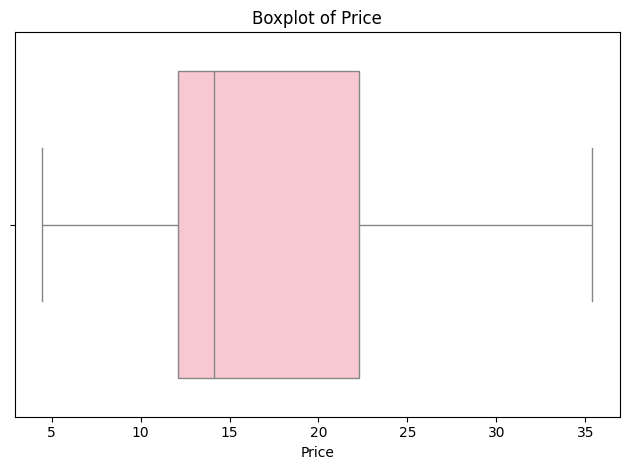

In [ ]:
# Box plot of price
sns.boxplot(data=fh_base, x='cost_of_the_order', color='pink')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

- We see the mean around 14, and 25% between 12 and 14. Another 25% is between 14 and 22. Price is somewhat right skewed.

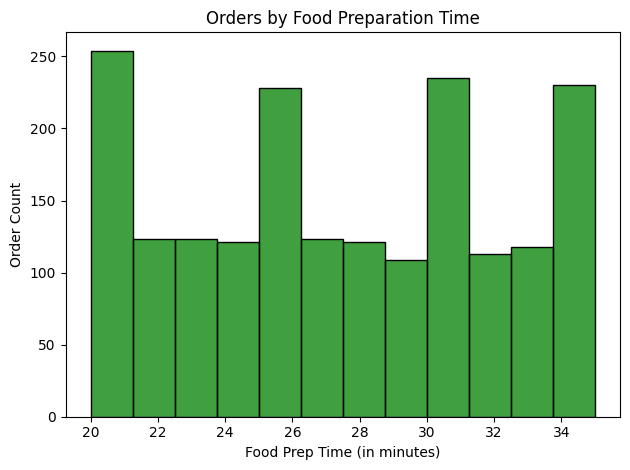

In [ ]:
# Histogram of food prep time
sns.histplot(data=fh_base, x='food_preparation_time', color='green')
plt.title('Orders by Food Preparation Time')
plt.xlabel('Food Prep Time (in minutes)')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- I'm intrigued by this graph. There are clear spikes around every interval of 5, which makes some sense. I presume a lot of people like to round off in intervals of five minutes. To investigate this, I actually want to reduce the bin width to 1.

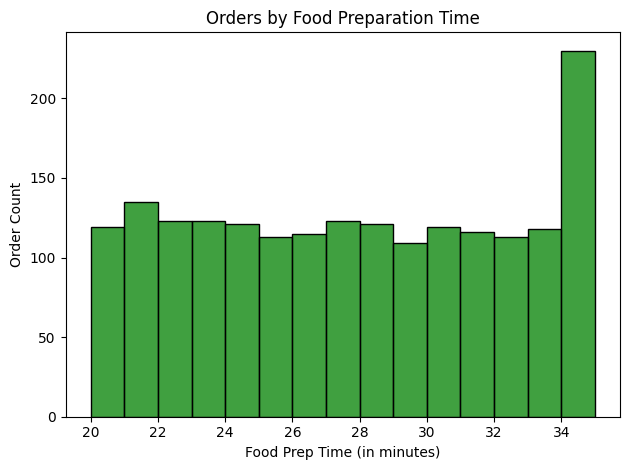

In [ ]:
# Histogram of food prep time
sns.histplot(data=fh_base, x='food_preparation_time', binwidth=1, color='green')
plt.title('Orders by Food Preparation Time')
plt.xlabel('Food Prep Time (in minutes)')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- That's even more interesting to me. The tendency around intervals of 5 disappeared. Still, worth looking closer at, but I'd say I debunked my theory.
- The spike around 35 minutes, after being fairly flat until then, might indicate a maximum prep time of 35 minutes per FoodHub policy, and some deviant reporting at or near that maximum value.

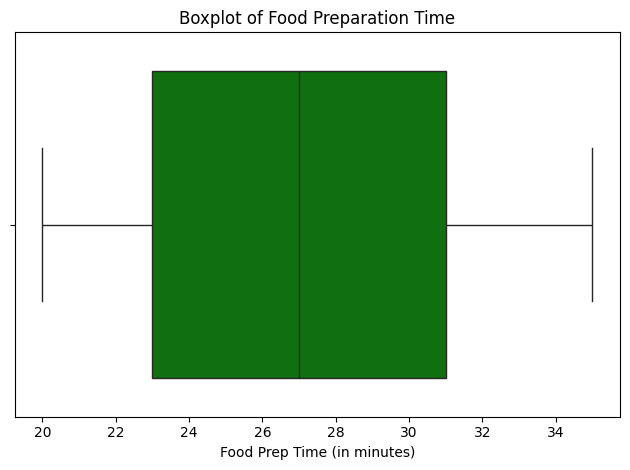

In [ ]:
# Box plot of food prep time
sns.boxplot(data=fh_base, x='food_preparation_time', color='green')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Prep Time (in minutes)')
plt.tight_layout()
plt.show()

- Nothing spectacular in here, just a mean around 27 minutes. No noticable outliers. Slightly right-skewed, as shown in the spike around 35 minutes.

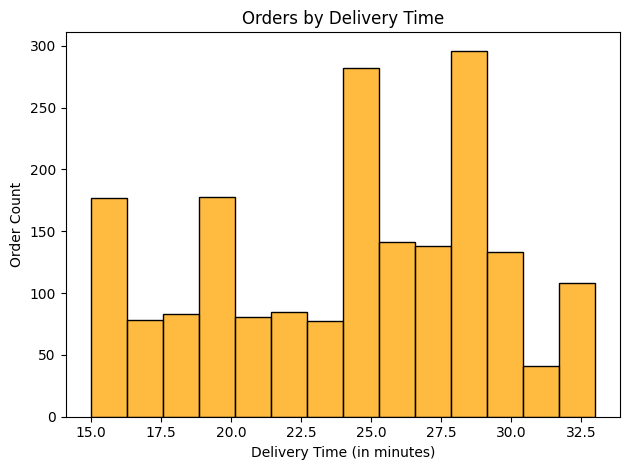

In [ ]:
# Histogram of delivery time
sns.histplot(data=fh_base, x='delivery_time', color='orange')
plt.title('Orders by Delivery Time')
plt.xlabel('Delivery Time (in minutes)')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

- This seems fairly chaotic again, and I can't really see anything too interesting. Let's go to 1 minute bins again.

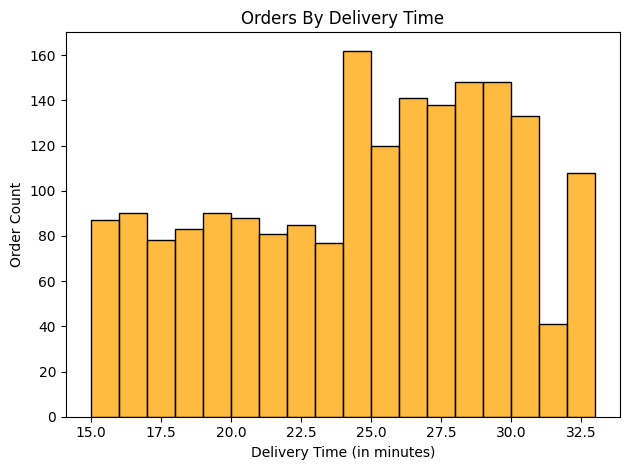

In [ ]:
# Histogram of delivery time
sns.histplot(data=fh_base, x='delivery_time', binwidth=1, color='orange')
plt.title('Orders By Delivery Time')
plt.ylabel('Order Count')
plt.xlabel('Delivery Time (in minutes)')
plt.tight_layout()
plt.show()

- No specific patterns identified. Moving on to the box plot.

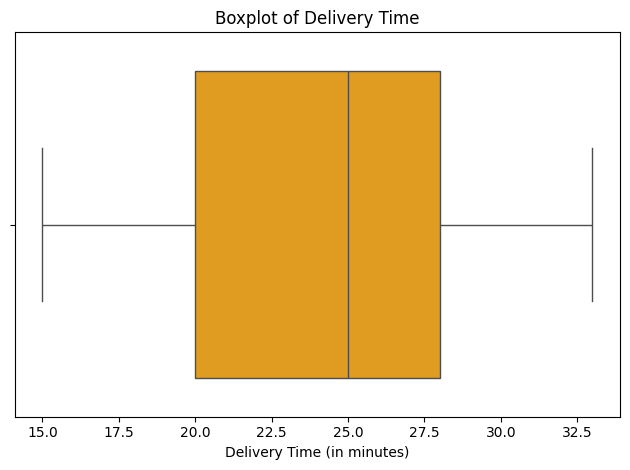

In [ ]:
# Box plot of delivery time
sns.boxplot(data=fh_base, x='delivery_time', color='orange')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (in minutes)')
plt.tight_layout()
plt.show()

- Nothing spectacular here, just a mean around 25 and a 50% range between 20 and 28.

* One more thing I'm interested in. I want to add a column for total wait time, which is meal prep plus delivery time.

In [ ]:
# New data frame called fh_extra for the additional column. Prefer to leave the base data in tact.
fh_extra = fh_base.copy()
fh_extra['total_wait_time'] = fh_extra['food_preparation_time'] + fh_extra['delivery_time']
fh_extra

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_wait_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


- I'll conclude my univariate analysis on the new field, total wait time.

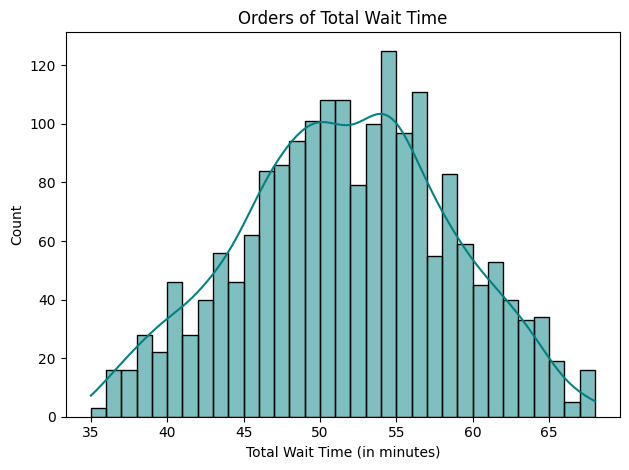

In [ ]:
# Histogram of delivery time
sns.histplot(data=fh_extra, x='total_wait_time', binwidth=1, color='teal', kde=True)
plt.title('Orders of Total Wait Time')
plt.xlabel('Total Wait Time (in minutes)')
plt.tight_layout()
plt.show()

- Final observation on the univatiate data. I think its interesting that, not alone but together, the two time values begin to look a bit like a normal distribution, especially with the KDE line added in. Just sayin'.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

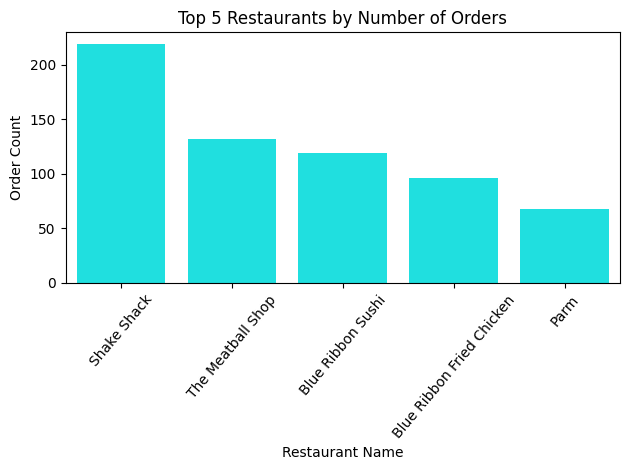

In [ ]:
# Count values
order_counts = fh_base['restaurant_name'].value_counts()

# Slice to top five
top_5 = order_counts.index[:5]

sns.countplot(data=fh_base, x='restaurant_name', order=top_5, color='aqua')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=50)
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


#### Observations:


- Top 5 are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, in descending order.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Creating new dataframe with only weekend data
fh_weekend = fh_base[fh_base['day_of_the_week'] == 'Weekend'].copy()
fh_weekend.reset_index(drop=True,inplace=True)
fh_weekend

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
3,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
4,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1346,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1347,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1348,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1349,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


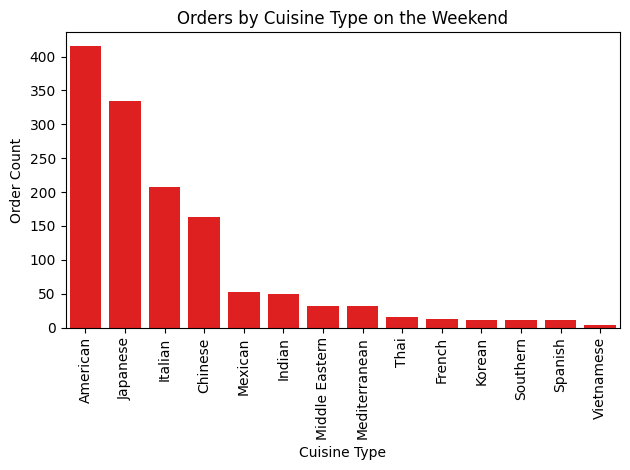

In [ ]:
# Same code from 6, using the new data frame
order_types = fh_weekend['cuisine_type'].value_counts().index
sns.countplot(data=fh_weekend, x='cuisine_type', order=order_types, color='red')
plt.title('Orders by Cuisine Type on the Weekend')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

#### Observations:
- The top 5 are in the same order as the graph in #6, just slightly lower counts.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Get total # orders
num_orders = len(fh_base)

# Get total # orders where price over 20
num_high_orders = len(fh_base.loc[fh_base['cost_of_the_order']>20])

# Get percentage
print(100 * num_high_orders / num_orders)

29.24130663856691


#### Observations:
- Approx 29.2% of the orders are above 20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Just going to use the describe method again
fh_base['delivery_time'].describe()


,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


#### Observations:


- The mean is about 24 minutes. I think that it's best to round to the nearest minute here.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Grab first 3 rows of value count
fh_base['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


- Customer 52832 placed 13 orders, 47440 placed 10, and 83287 placed 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Let's start first by framing some questions it might be worthwhile to ask from this data.
1. Is there a relationship between the order price and food prep time?
2. Does delivery time vary between the week and weekend?
3. Does delivery or total wait time influence rating?
4. Are some cuisine types more expensive than others?
5. Does food prep time and delivery time differ by day of week?
6. I admit, I'm starting to stretch here, asked for help, got one last idea to relate price and rating based on day of week.
7. Ahh...I end with a heatmap.

**1. Is there a relationship between the order price and food prep time?**

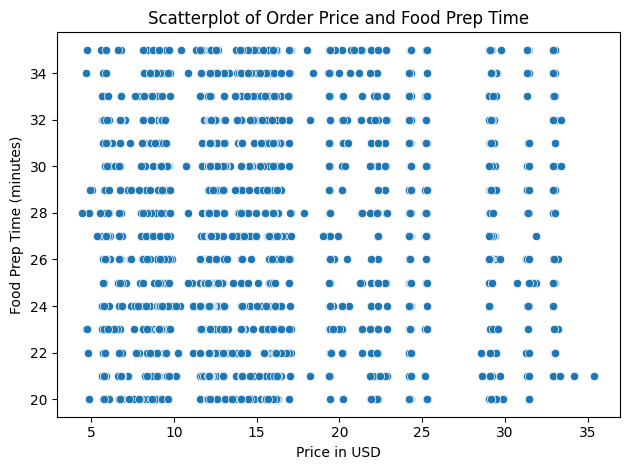

In [ ]:
# Scatter plot
sns.scatterplot(data=fh_base, x='cost_of_the_order', y='food_preparation_time')
plt.title('Scatterplot of Order Price and Food Prep Time')
plt.xlabel('Price in USD')
plt.ylabel('Food Prep Time (minutes)')
plt.tight_layout()
plt.show()

- Yeah, no clear pattern showing. Let's add a regression line just to be sure:

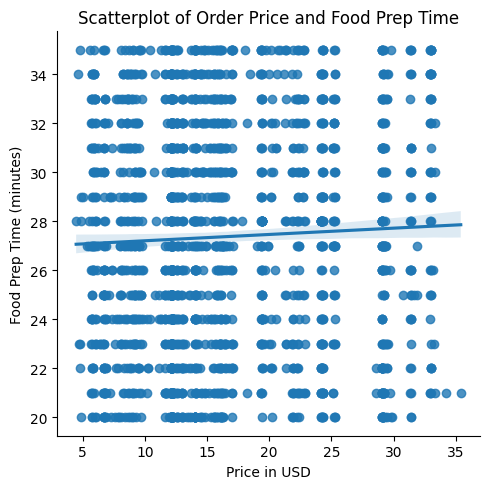

In [ ]:
# Same plot, added the line
sns.lmplot(data=fh_base, x='cost_of_the_order', y='food_preparation_time')
plt.title('Scatterplot of Order Price and Food Prep Time')
plt.xlabel('Price in USD')
plt.ylabel('Food Prep Time (minutes)')
plt.tight_layout()
plt.show()

- Yeah, that line is almost horizontal, showing virtually no correlation. That's not surprising.

**2. Does delivery time vary between the week and weekend?**

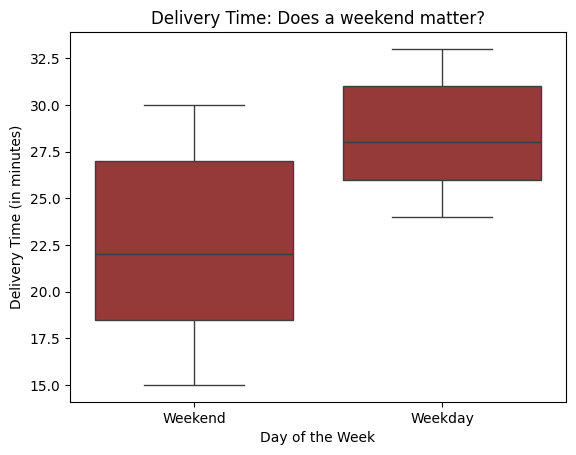

In [ ]:
sns.boxplot(data=fh_base, x='day_of_the_week', y='delivery_time', color='brown')
plt.title('Delivery Time: Does a weekend matter?')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (in minutes)')
plt.show()

- Does a weekend matter? Like, HECK YES it matters. I don't know the precise mechanism yet. This should be enough for a grade. Still, I assure you that, for better or for worse, my brain will now spend 2 days trying to philosophically comprehend why drivers lag on weekdays. Thanks, Boxplot.

**3. Does delivery or total wait time influence rating?**


In [ ]:
# First, I'm dropping the not given ratings for this test
fh_ratings = fh_extra[fh_extra['rating'] != 'Not given'].copy()
fh_ratings.reset_index(drop=True,inplace=True)
fh_ratings.sort_values(by='rating', inplace=True)
fh_ratings

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_wait_time
973,1477949,385023,Rubirosa,Italian,24.35,Weekend,3,30,28,58
627,1476629,317993,Melt Shop,American,12.66,Weekend,3,27,26,53
145,1476753,195723,Cafe Habana,Mexican,13.97,Weekday,3,34,28,62
625,1478374,64151,Rubirosa,Italian,5.97,Weekend,3,30,25,55
624,1476903,53874,Sarabeth's,American,25.17,Weekend,3,28,23,51
...,...,...,...,...,...,...,...,...,...,...
521,1476616,348096,Parm,Italian,31.43,Weekday,5,28,25,53
522,1476968,99621,Jack's Wife Freda,Mediterranean,29.05,Weekend,5,35,28,63
523,1478045,97420,Yama 49,Japanese,31.33,Weekend,5,21,27,48
485,1478180,270525,The Smile,American,22.26,Weekend,5,25,26,51


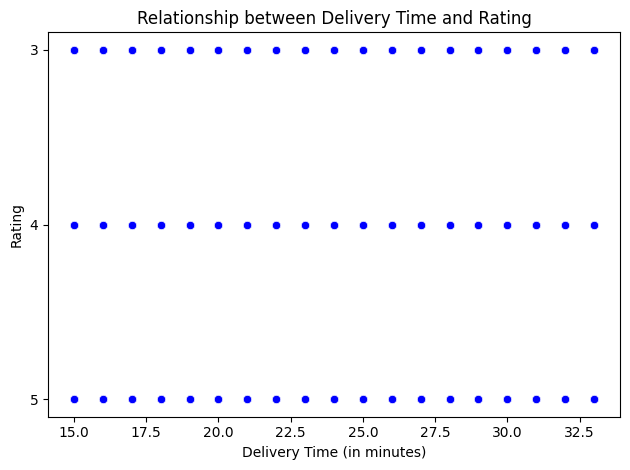

In [ ]:
# Now, time for a scatterplot comparing rating to delivery time
sns.scatterplot(data=fh_ratings, y='rating', x='delivery_time', color='blue')
plt.title('Relationship between Delivery Time and Rating')
plt.xlabel('Delivery Time (in minutes)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

- Uh...yeah, I'm not getting anything either. Let's switch to

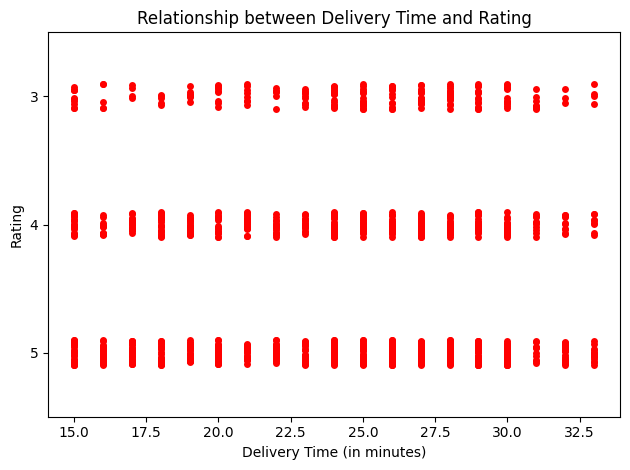

In [ ]:
sns.stripplot(x='delivery_time', y='rating', data=fh_ratings, color='red')
plt.title('Relationship between Delivery Time and Rating')
plt.xlabel('Delivery Time (in minutes)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

- One last time, let's add in the total wait time and compare to ratings. Here goes nothing.

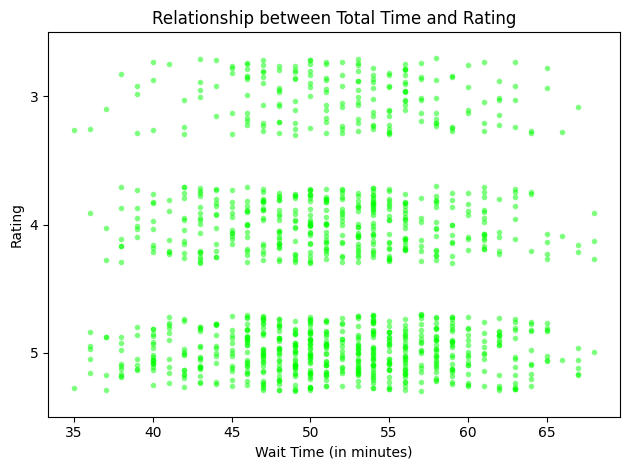

In [ ]:
# Getting fancy, adding attributes I don't fully understand.
sns.stripplot(data=fh_ratings, y='rating', x='total_wait_time', jitter=0.3, alpha=0.5, size=4, color='lime')
plt.title('Relationship between Total Time and Rating')
plt.xlabel('Wait Time (in minutes)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

- Yeah, that's a really nice looking graph that I have absolutely no feedback on. Hopefully effort counts on this grade.

**4. Are some cuisine types more expensive than others?**

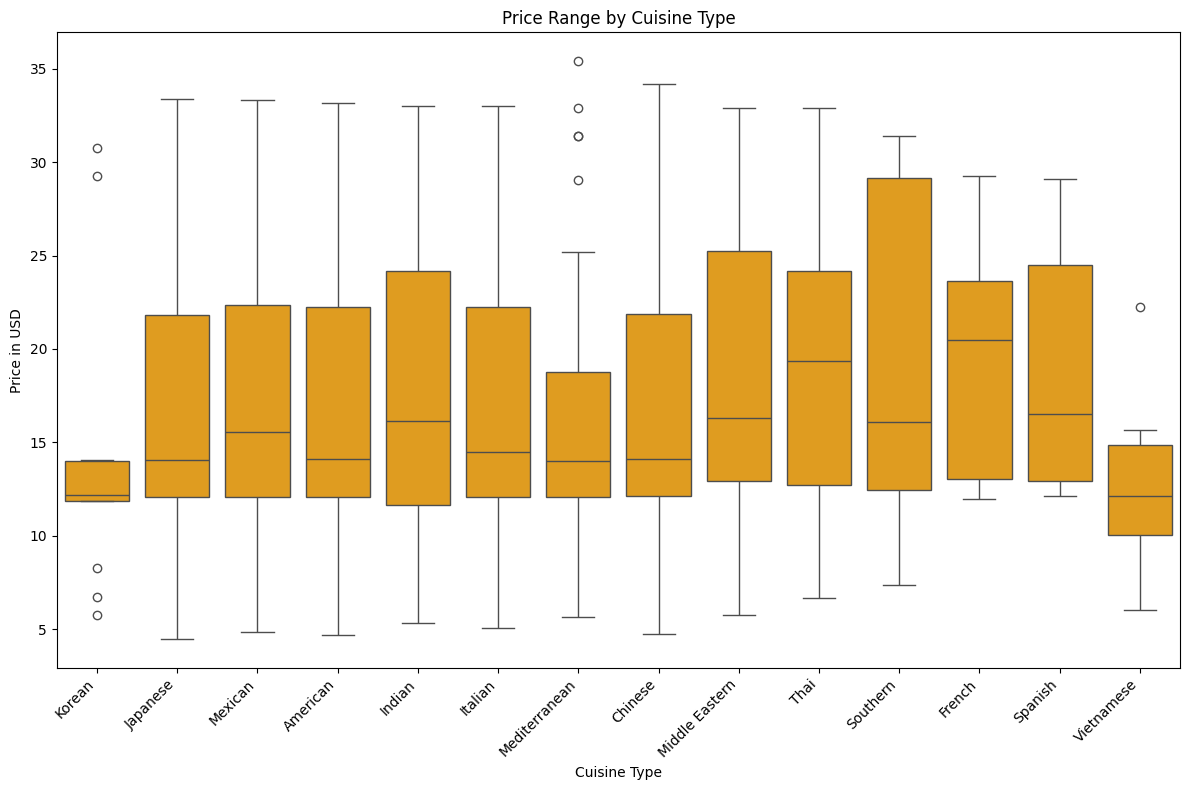

In [ ]:
plt.figure(figsize=(12, 8)) # Let's go bigger
sns.boxplot(data=fh_base, x='cuisine_type', y='cost_of_the_order', color='orange')
plt.title('Price Range by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Price in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Short answer...yes.
- One of the more interesting graphs yet. This is the first graph I am really seeing outliers on.

**5. Does food prep time and delivery time differ by day of week?**

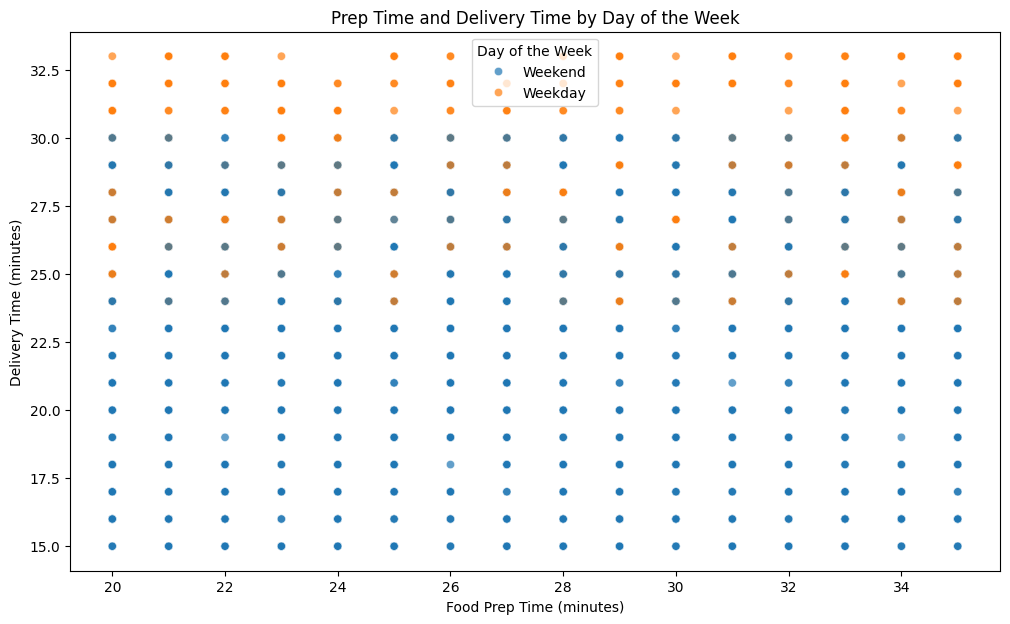

In [ ]:
# Stretching my analytical abilities with this dataset with this one.
plt.figure(figsize=(12, 7))
sns.scatterplot(data=fh_base, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', alpha=0.7)
plt.title('Prep Time and Delivery Time by Day of the Week')
plt.xlabel('Food Prep Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.legend(title='Day of the Week')
plt.show()

- I'm not getting anything else. Good practice making graphs, but I'm spent on this dataset. I see nothing in the last graph.

**6. I admit, I'm starting to stretch here, asked for help, got one last idea to relate price and rating based on day of week.**

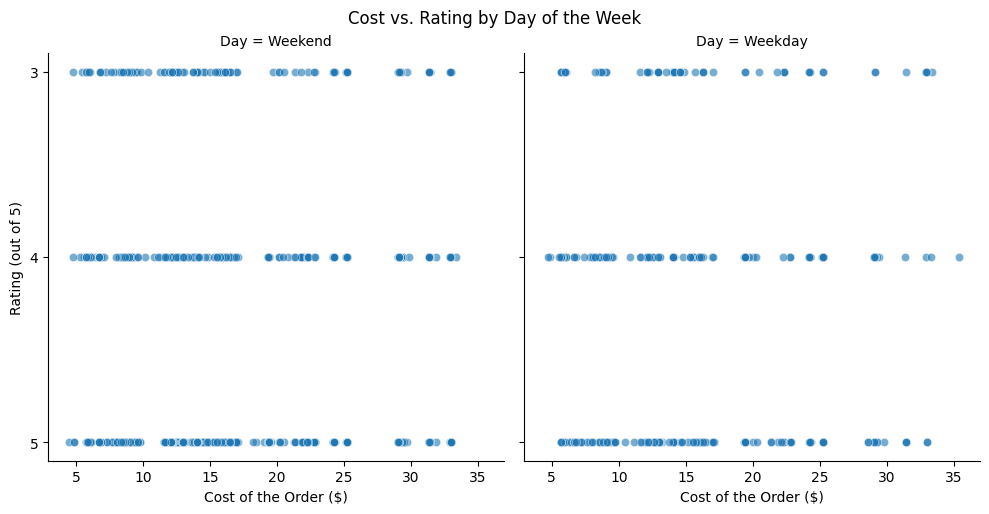

In [ ]:
# Google suggests a facetgrid...
g = sns.FacetGrid(fh_ratings, col="day_of_the_week", height=5, aspect=1)
g.map(sns.scatterplot, "cost_of_the_order", "rating", alpha=0.6)
g.set_axis_labels("Cost of the Order ($)", "Rating (out of 5)")
g.set_titles("Day = {col_name}")
plt.suptitle('Cost vs. Rating by Day of the Week', y=1.02) # Add overall title
plt.show()


Not really seeing any noteworthy patterns here either.

**7. I'll wrap the multivariate with a heat map.**

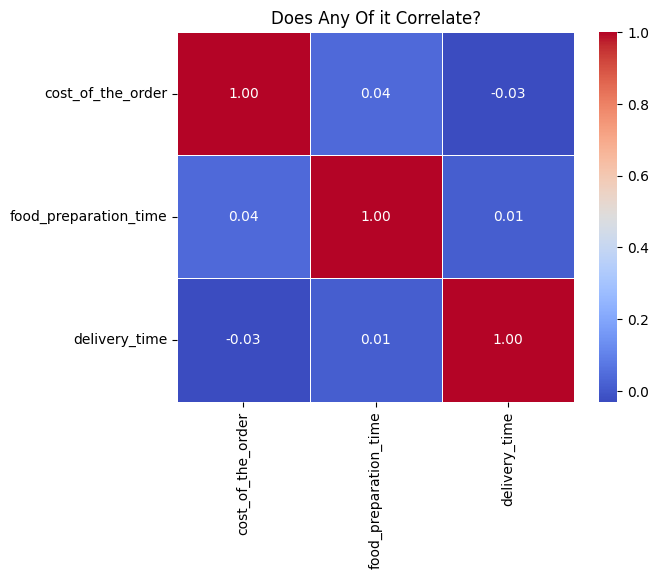

In [ ]:
# Grab those number columns (For now, ratings doesn't count)
corr_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr_mat = fh_base[corr_cols].corr()

# plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Does Any Of it Correlate?')
plt.show()

- This turned out to be a pretty boring data set. I'm over it. Last few questions.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Make the ratings column numeric
fh_ratings['rating'] = pd.to_numeric(fh_ratings['rating'], errors='coerce')

# Use the ratings dataframe to summarize by restaurant
fh_summary_by_rest = fh_ratings.groupby('restaurant_name')['rating'].agg(total_ratings='count', avg_rating='mean')
fh_summary_by_rest

,total_ratings,avg_rating
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Amma,2,4.500000
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


In [ ]:
# Filter for promotional restaurants
fh_promotion = fh_summary_by_rest[(fh_summary_by_rest['total_ratings'] > 50) & (fh_summary_by_rest['avg_rating'] > 4)]
fh_promotion

,total_ratings,avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
- Four restaurants include Blue Ribbom Fried Chichen, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a new dataframe with revenue column
fh_revenue = fh_base.copy()
fh_revenue['net_revenue'] = 0.0
fh_revenue

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0.0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0.0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0.0
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,0.0
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,0.0
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,0.0
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,0.0


In [ ]:
# Define conditions
condition1 = fh_revenue['cost_of_the_order'] > 20
condition2 = (fh_revenue['cost_of_the_order'] > 5) & (fh_revenue['cost_of_the_order'] <= 20)

# Apply conditions
fh_revenue.loc[condition1, 'net_revenue'] = fh_revenue.loc[condition1, 'cost_of_the_order'] * 0.25
fh_revenue.loc[condition2, 'net_revenue'] = fh_revenue.loc[condition2, 'cost_of_the_order'] * 0.15

fh_revenue

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [ ]:
# Sum net revenue
total_revenue = fh_revenue['net_revenue'].sum()
total_revenue

np.float64(6166.303)

#### Observations:


- Total Revenue = $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Total # Orders
fh_extra.shape

(1898, 10)

In [ ]:
# New data frame filtered for orders over sixty minutes
fh_extra_long  = fh_extra[fh_extra['total_wait_time'] > 60]
fh_extra_long.shape

(200, 10)

In [ ]:
# Calculate percentage
print(100 * fh_extra_long.shape[0] / fh_extra.shape[0])

10.53740779768177


#### Observations:


- 10.54% of orders took longer that 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

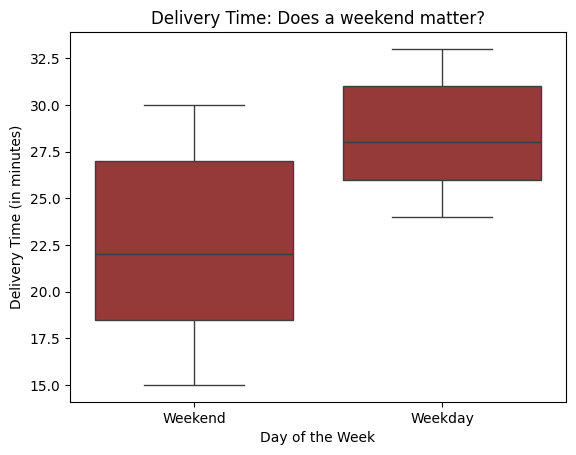

In [ ]:
# REPEATING code from question 2 on multivariate analysis
sns.boxplot(data=fh_base, x='day_of_the_week', y='delivery_time', color='brown')
plt.title('Delivery Time: Does a weekend matter?')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (in minutes)')
plt.show()

#### Observations:
- Mean delivery time on a weekend is approx. 22.2 minutes on a weekend and 28 on a weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- About 61% of orders are receiving ratings
- American, Japanese, Italian, and Chinese are the most popular cuisine types

### Recommendations:

- Increased marketing for Mexican and Indian cuisine to increase order volume
- Offer discounts during the week to increase order volume

# Exporting to HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exporting to HTML
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Burns Greg Food Hub Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Burns Greg Food Hub Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 26 image(s).
[NbConvertApp] Writing 1593778 bytes to /content/drive/MyDrive/Colab Notebooks/Burns Greg Food Hub Project.html


---